<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Load and Prepare Data

In [2]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

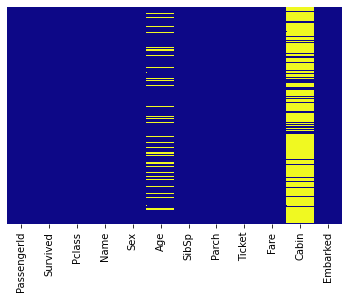

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
pd.crosstab(df.Sex,df.Survived,normalize = "all")

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

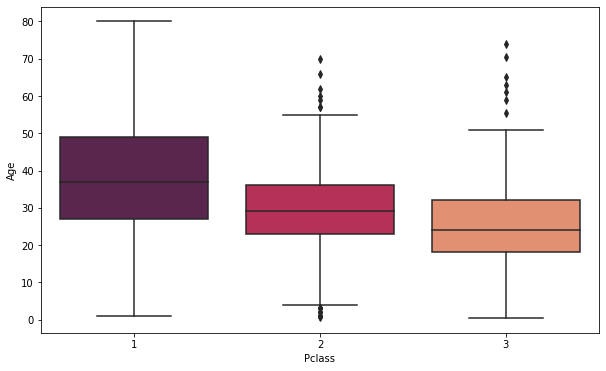

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Pclass',y='Age',palette='rocket')

## Data Preprocessing

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [13]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
df.Embarked=df['Embarked'].fillna('S')

In [15]:
df.drop('Cabin',axis=1,inplace=True)

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
sex=pd.get_dummies(df.Sex,drop_first=True)

In [19]:
embarked=pd.get_dummies(df.Embarked,drop_first=True)

In [20]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
df=pd.concat([df,sex,embarked],axis=1)

In [22]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


## Strorytelling - Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

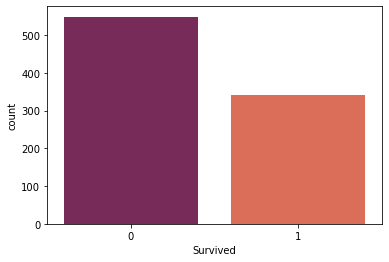

In [23]:
sns.countplot(data=df,x='Survived',palette='rocket')

<AxesSubplot:xlabel='male', ylabel='count'>

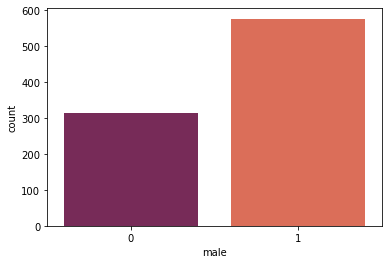

In [24]:
sns.countplot(data=df,x='male',palette='rocket')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

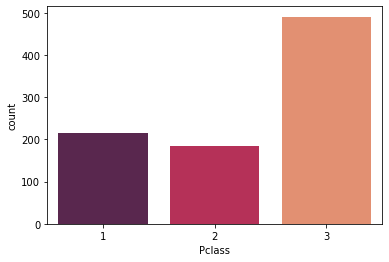

In [25]:
sns.countplot(data=df,x='Pclass',palette='rocket')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

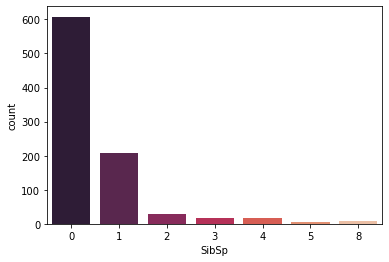

In [26]:
sns.countplot(data=df,x='SibSp',palette='rocket')

<AxesSubplot:xlabel='Parch', ylabel='count'>

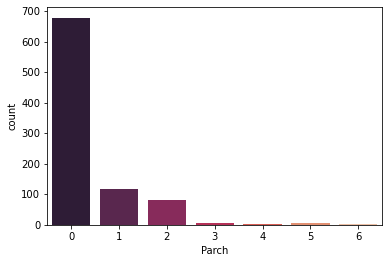

In [27]:
sns.countplot(data=df,x='Parch',palette='rocket')

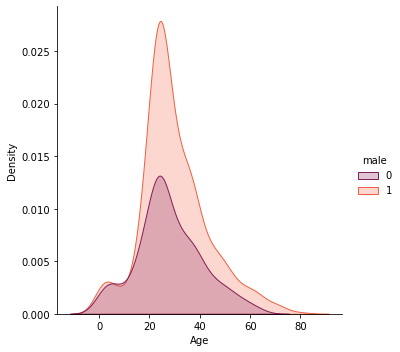

In [28]:
sns.displot(df,x='Age',hue='male',kind='kde',fill="True",palette='rocket')

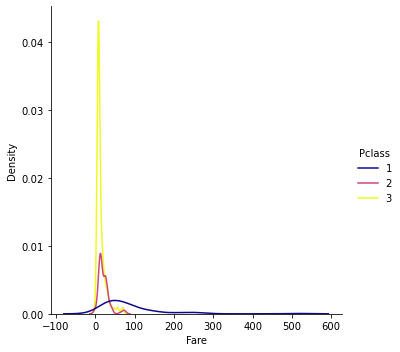

In [29]:
sns.displot(data=df,x='Fare',hue='Pclass',kind='kde',palette='plasma')

## Train your model (Classification)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [33]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)

In [35]:
#Logestic Regression Model

In [36]:
logreg=LogisticRegression()

In [37]:
logreg.fit(X_train,y_train)

C:\Users\Special One\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_train_pred_logred=logreg.predict(X_train)
y_test_pred_logred=logreg.predict(X_test)

In [39]:
print('accuracy of train:',accuracy_score(y_train,y_train_pred_logred))
print('accuracy of test:',accuracy_score(y_test,y_test_pred_logred))

accuracy of train: 0.7926023778071334
accuracy of test: 0.7835820895522388


In [40]:
confusion_matrix(y_test,y_test_pred_logred)

array([[66, 12],
       [17, 39]], dtype=int64)

In [41]:
print(classification_report(y_test,y_test_pred_logred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        78
           1       0.76      0.70      0.73        56

    accuracy                           0.78       134
   macro avg       0.78      0.77      0.77       134
weighted avg       0.78      0.78      0.78       134



In [42]:
#Support Vector Machine (SVM) Model

In [43]:
svm=SVC()

In [44]:
svm.fit(X_train,y_train)

SVC()

In [45]:
y_train_pred_svm=svm.predict(X_train)
y_test_pred_svm=svm.predict(X_test)

In [46]:
print('accuracy of train:',accuracy_score(y_train,y_train_pred_svm))
print('accuracy of test:',accuracy_score(y_test,y_test_pred_svm))

accuracy of train: 0.6605019815059445
accuracy of test: 0.5970149253731343


In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             {'C':[0.25, 0.5, 0.75, 1],'kernel':['poly']}]

In [49]:
grid_search=GridSearchCV(estimator=svm,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=10)

In [50]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly']}],
             scoring='accuracy')

In [51]:
grid_search.best_estimator_

SVC(C=1, kernel='linear')

In [52]:
grid_search.best_score_

0.794

In [53]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [54]:
#KNN model

In [55]:
knn=KNeighborsClassifier()

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
y_train_pred_knn=knn.predict(X_train)
y_test_pred_knn=knn.predict(X_test)

In [58]:
print('accuracy of train:',accuracy_score(y_train,y_train_pred_knn))
print('accuracy of test:',accuracy_score(y_test,y_test_pred_knn))

accuracy of train: 0.7490092470277411
accuracy of test: 0.7089552238805971


In [59]:
grid_knn=GridSearchCV(estimator=knn,param_grid={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25]},n_jobs=-1)

In [60]:
grid_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25]})

In [61]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=25)

In [62]:
grid_knn.best_score_

0.6657459044963401

In [63]:
#Decision Tree

In [64]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
y_train_pred_dt=dt_model.predict(X_train)
y_test_pred_dt=dt_model.predict(X_test)

In [66]:
print('accuracy of train:',accuracy_score(y_train,y_train_pred_dt))
print('accuracy of test:',accuracy_score(y_test,y_test_pred_dt))

accuracy of train: 1.0
accuracy of test: 0.7238805970149254


In [67]:
accuracies = cross_val_score(estimator = dt_model, X = X_train, y = y_train, cv = 10)

In [68]:
accuracies.mean()

0.7278070175438597

In [69]:
#Random Forest Classifier

In [70]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [71]:
y_train_pred_rf=rf.predict(X_train)
y_test_pred_rf=rf.predict(X_test)

In [72]:
print('accuracy of train:',accuracy_score(y_train,y_train_pred_rf))
print('accuracy of test:',accuracy_score(y_test,y_test_pred_rf))

accuracy of train: 1.0
accuracy of test: 0.8283582089552238


In [73]:
#XGBoosts Classifier

In [74]:
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)

C:\Users\Special One\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_train_pred_xgb=xgboost.predict(X_train)
y_test_pred_xgb=xgboost.predict(X_test)

In [76]:
print('accuracy of train:',accuracy_score(y_train,y_train_pred_xgb))
print('accuracy of test:',accuracy_score(y_test,y_test_pred_xgb))

accuracy of train: 1.0
accuracy of test: 0.7985074626865671


## Test Result

In [77]:
test=pd.read_csv('test.csv')

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [80]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
test.drop('Cabin',axis=1,inplace=True)

In [82]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

In [83]:
test.dropna(inplace=True)

In [84]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [86]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [87]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [88]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [89]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [90]:
test_pred=rf.predict(test)

In [91]:
prediction=pd.DataFrame({'Survived':test_pred})

In [92]:
prediction

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
412,0
413,1
414,0
415,0


In [93]:
df_pred=pd.concat([test,prediction], axis=1,join='inner')

In [94]:
df_pred

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.5,0,0,7.8292,1,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
412,1304,3,28.0,0,0,7.7750,0,0,1,0
413,1305,3,24.0,0,0,8.0500,1,0,1,1
414,1306,1,39.0,0,0,108.9000,0,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1,0


In [95]:
sub=df_pred[['PassengerId','Survived']]

In [96]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
412,1304,0
413,1305,1
414,1306,0
415,1307,0


In [97]:
sub.to_csv('MySubmission.csv' , index=False)

## Send us the Result (Maktabkhoone)